In [1]:
pip install opencv-python numpy matplotlib scikit-image


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 262.6 kB/s eta 0:02:31
   ---------------------------------------- 0.0/39.5 MB 262.6 kB/s eta 0:02:31
   ---------------------------------------- 0.0/39.5 MB 262.6 kB/s eta 0:02:31
   ---------------------------------------- 0.1/39.5 MB 252.2 kB/s eta 0:02:37
   ---------------------------------------- 0.1/39.5 MB 245.8 kB/s eta 0:02:41
   ---------------------------------------- 0.1/39.5 MB 291.5 kB/s eta 0:02:16
   ---------------------------------------- 0.1/39.5 MB 313.8 kB/s eta 0:02:06
   ---------------------------------------- 0.2/39.5 MB 367.6 kB/s eta 0:01:48
   ---------------------------------------- 0.2/39.5 MB 403.5 kB/s eta 0:01:38
   ---------------------------------------- 0.2/39.5 MB 389.1 kB/s eta 0:01:41


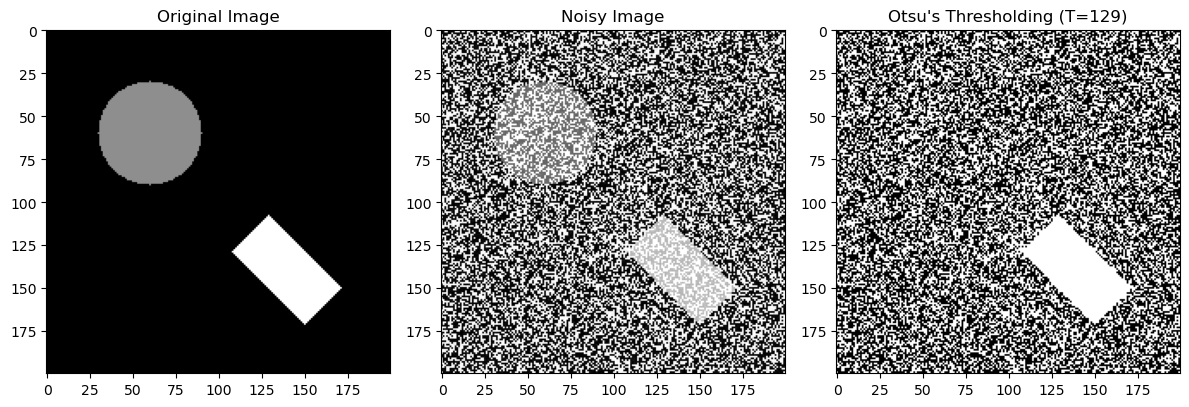

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Create synthetic image

img = np.zeros((200, 200), dtype=np.uint8)


cv2.circle(img, center=(60, 60), radius=30, color=100, thickness=-1)

box = cv2.boxPoints(((140, 140), (60, 30), 45))  # center, size, angle
box = np.intp(box)
cv2.drawContours(img, [box], 0, 180, -1)

# Add Gaussian noise
noise = np.random.normal(0, 10, img.shape).astype(np.uint8)
noisy_img = cv2.add(img, noise)

# Apply Otsu's thresholding
threshold_value, otsu_img = cv2.threshold(noisy_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Save outputs
result_path = '../Result'
cv2.imwrite(os.path.join(result_path, 'original.png'), img)
cv2.imwrite(os.path.join(result_path, 'noisy_image.png'), noisy_img)
cv2.imwrite(os.path.join(result_path, 'otsu_result.png'), otsu_img)

# Display
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_img, cmap='gray')
plt.subplot(1, 3, 3)
plt.title(f"Otsu's Thresholding (T={int(threshold_value)})")
plt.imshow(otsu_img, cmap='gray')
plt.tight_layout()
plt.show()
